## Tasks 
1. Create a dataset where each column is a field in the URL, each row is a search
2. For each search query, how many amenities were selected?
3. Create a metric and find the city with worst search algorithm

In [1]:
!ls -l

total 37128
-rw-r--r--  1 parker  staff     89932 Feb 20 10:32 url parsing.ipynb
-rw-r--r--@ 1 parker  staff  17912577 Feb 20 09:49 url_list.txt


In [2]:
!cat url_list.txt |head -2

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-19&hotel.stars_4=yes&hotel.min_score=4&hotel.adults=3&hotel.city=New+York,+NY,+United+States&hotel.checkout=2015-09-20&hotel.search_page=1
http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-14&hotel.stars_3=yes&hotel.min_score=4&hotel.adults=3&hotel.city=London,+United+Kingdom&hotel.checkout=2015-09-15&hotel.search_page=1
cat: stdout: Broken pipe


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = list()
with open("url_list.txt", "r") as f:
    for line in f:
        attributes = line.strip().split('?')[1].split("&")
        row = dict()
        for attr in attributes:
            name, value = attr.split("=")[0], attr.split("=")[1]
            row[name] = row.get(name, "") + value
        data.append(row)

In [5]:
data[:2]

[{'hotel.adults': '3',
  'hotel.checkin': '2015-09-19',
  'hotel.checkout': '2015-09-20',
  'hotel.city': 'New+York,+NY,+United+States',
  'hotel.min_score': '4',
  'hotel.search_page': '1',
  'hotel.stars_4': 'yes'},
 {'hotel.adults': '3',
  'hotel.checkin': '2015-09-14',
  'hotel.checkout': '2015-09-15',
  'hotel.city': 'London,+United+Kingdom',
  'hotel.min_score': '4',
  'hotel.search_page': '1',
  'hotel.stars_3': 'yes'}]

**1. Create the dataset**

In [6]:
url_df = pd.DataFrame(data)
print(url_df.shape)
url_df.head()

(77677, 18)


,hotel.adults,hotel.amenities,hotel.checkin,hotel.checkout,hotel.children,hotel.city,hotel.couponCode,hotel.customMaximumPriceFilter,hotel.customMinimumPriceFilter,hotel.freeCancellation,hotel.max_score,hotel.min_score,hotel.search_page,hotel.stars_1,hotel.stars_2,hotel.stars_3,hotel.stars_4,hotel.stars_5
0,3,NaN,2015-09-19,2015-09-20,NaN,"New+York,+NY,+United+States",NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,NaN,yes,NaN
1,3,NaN,2015-09-14,2015-09-15,NaN,"London,+United+Kingdom",NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,yes,NaN,NaN
2,2,NaN,2015-09-26,2015-09-27,NaN,"New+York,+NY,+United+States",NaN,175,NaN,NaN,NaN,5,1,NaN,NaN,NaN,yes,NaN
3,1,NaN,2015-09-02,2015-09-03,NaN,"Hong+Kong,+Hong+Kong",NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,NaN,yes,yes
4,3,NaN,2015-09-20,2015-09-29,NaN,"London,+United+Kingdom",NaN,275,NaN,NaN,NaN,5,1,NaN,NaN,NaN,NaN,NaN


In [7]:
#many features are missing for most of the users
url_df.isna().sum()

hotel.adults                          0
hotel.amenities                   76973
hotel.checkin                         0
hotel.checkout                        0
hotel.children                    77417
hotel.city                            0
hotel.couponCode                  75456
hotel.customMaximumPriceFilter    28389
hotel.customMinimumPriceFilter    76407
hotel.freeCancellation            59728
hotel.max_score                   72160
hotel.min_score                   16851
hotel.search_page                     0
hotel.stars_1                     68354
hotel.stars_2                     67746
hotel.stars_3                     62815
hotel.stars_4                     64973
hotel.stars_5                     73374
dtype: int64

**2. For each search query, how many amenities were selected**

In [8]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 18 columns):
hotel.adults                      77677 non-null object
hotel.amenities                   704 non-null object
hotel.checkin                     77677 non-null object
hotel.checkout                    77677 non-null object
hotel.children                    260 non-null object
hotel.city                        77677 non-null object
hotel.couponCode                  2221 non-null object
hotel.customMaximumPriceFilter    49288 non-null object
hotel.customMinimumPriceFilter    1270 non-null object
hotel.freeCancellation            17949 non-null object
hotel.max_score                   5517 non-null object
hotel.min_score                   60826 non-null object
hotel.search_page                 77677 non-null object
hotel.stars_1                     9323 non-null object
hotel.stars_2                     9931 non-null object
hotel.stars_3                     14862 non-null object
hote

In [9]:
url_df[url_df['hotel.amenities'].notna()].head(3)

,hotel.adults,hotel.amenities,hotel.checkin,hotel.checkout,hotel.children,hotel.city,hotel.couponCode,hotel.customMaximumPriceFilter,hotel.customMinimumPriceFilter,hotel.freeCancellation,hotel.max_score,hotel.min_score,hotel.search_page,hotel.stars_1,hotel.stars_2,hotel.stars_3,hotel.stars_4,hotel.stars_5
333,1,yes_smoking,2015-08-31,2015-09-04,NaN,"San+Francisco,+California,+United+States",NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN,NaN,yes,NaN
417,1,shuttle,2015-09-18,2015-09-19,NaN,"New+York,+NY,+United+States",NaN,175,NaN,NaN,NaN,4,1,NaN,NaN,yes,NaN,NaN
532,1,yes_smoking,2015-09-01,2015-09-10,NaN,"New+York,+NY,+United+States",yes,125,NaN,yes,NaN,5,1,NaN,NaN,NaN,NaN,NaN


In [10]:
url_df['num_amenities'] = url_df['hotel.amenities'].apply(lambda x: 0 if len(str(x)) < 5 else len(str(x).split(" ")))
url_df[url_df['num_amenities'] != 0].head(3)

,hotel.adults,hotel.amenities,hotel.checkin,hotel.checkout,hotel.children,hotel.city,hotel.couponCode,hotel.customMaximumPriceFilter,hotel.customMinimumPriceFilter,hotel.freeCancellation,hotel.max_score,hotel.min_score,hotel.search_page,hotel.stars_1,hotel.stars_2,hotel.stars_3,hotel.stars_4,hotel.stars_5,num_amenities
333,1,yes_smoking,2015-08-31,2015-09-04,NaN,"San+Francisco,+California,+United+States",NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN,NaN,yes,NaN,1
417,1,shuttle,2015-09-18,2015-09-19,NaN,"New+York,+NY,+United+States",NaN,175,NaN,NaN,NaN,4,1,NaN,NaN,yes,NaN,NaN,1
532,1,yes_smoking,2015-09-01,2015-09-10,NaN,"New+York,+NY,+United+States",yes,125,NaN,yes,NaN,5,1,NaN,NaN,NaN,NaN,NaN,1


**3. create a metric for evaluation and find city with worst search algorithm**

Metric: avg number of hotel search pages <br\>
City performance: SF > HK > NYC > London

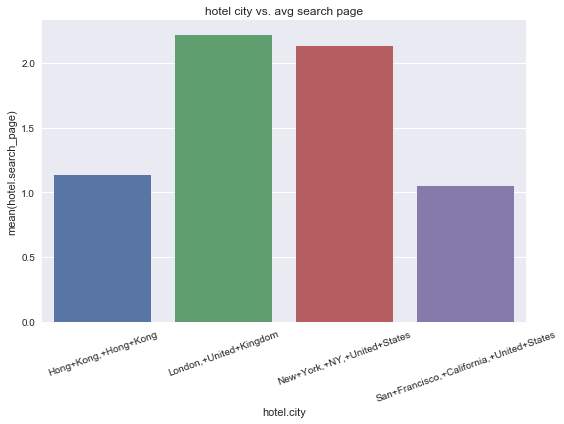

In [16]:
url_df['hotel.search_page'] = url_df['hotel.search_page'].astype(np.int16)
city_avg = url_df.groupby('hotel.city')['hotel.search_page'].mean().reset_index()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
sns.barplot(x = 'hotel.city', y = 'hotel.search_page', data = city_avg, ax = ax)
ax.set_title("hotel city vs. avg search page")
plt.xticks(rotation = 20)
plt.tight_layout()